# CS 457 -  Homework Assignment 9: Classification
## Name: Owais Waheed (ow07611)
### Email: ow07611@st.habib.edu.pk




In [1]:
# Importing required libraries

import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Classification using CreditCardData.csv

In [2]:
# importing data into data frame from the csv file
df = pd.read_csv('CreditCardData.csv')
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## Question 1

In [4]:
# cleaning the data that is removing all the null values from the data set
#Cleaning the data
df = df[df != '?'].dropna()
df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [5]:
# Here we can see that after removing null values. the rows are reduced from 690 to 653. we can further get the information about data by following command.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            653 non-null    object 
 1   Age             653 non-null    object 
 2   Debt            653 non-null    float64
 3   Married         653 non-null    object 
 4   BankCustomer    653 non-null    object 
 5   EducationLevel  653 non-null    object 
 6   Ethnicity       653 non-null    object 
 7   YearsEmployed   653 non-null    float64
 8   PriorDefault    653 non-null    object 
 9   Employed        653 non-null    object 
 10  CreditScore     653 non-null    int64  
 11  DriversLicense  653 non-null    object 
 12  Citizen         653 non-null    object 
 13  ZipCode         653 non-null    object 
 14  Income          653 non-null    int64  
 15  Approved        653 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.7+ KB


## Question 2

In [6]:
# Replacing approved coloumn values with "Yes" or "No" by using .replace function


df['Approved'] = df['Approved'].replace({'-': 0, '+': 1})
df['Approved'] 

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: Approved, Length: 653, dtype: int64

## Question 3,4

In [7]:
# Before splitting data into training and testing models, we have to convert the whole data into numerical values.

# Converting age and zipcode from object type to float because they are numerical values in essence. 
df[['Age', 'ZipCode']] = df[['Age', 'ZipCode']].astype(float)

# selecting all the coloumns which have categorical values 
cat_cols = df.select_dtypes(exclude=['int', 'float']).columns.tolist()

#Performing hot encoding on all the categorical data. Hot encoding is basically dividing a coloumn based on the unique values
#and then adding 0 or 1 / yes or no in its values if the entry has that feature

df_model = pd.get_dummies(df, columns=cat_cols)
df_model


,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Approved,Male_a,Male_b,Married_l,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
0,30.83,0.000,1.25,1,202.0,0,1,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,1,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,1,0,1,0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
686,22.67,0.750,2.00,2,200.0,394,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
687,25.25,13.500,2.00,1,200.0,1,0,1,0,0,...,0,1,0,0,1,0,1,1,0,0
688,17.92,0.205,0.04,0,280.0,750,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0


In [8]:
# Splitting the data into training and testing model using 30% for test and 70% for training model as asked in question 3. 
# Also seeding the data using random_state = 99 as asked in q.4 to get same models/ data frames whenever running the code.

df_train, df_test = train_test_split(df_model, test_size=0.3, random_state=100)
# df_train
df_test

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Approved,Male_a,Male_b,Married_l,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
594,38.67,0.210,0.085,0,280.0,0,1,0,1,0,...,0,0,1,1,0,0,1,1,0,0
331,33.25,2.500,2.500,0,0.0,2,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0
122,24.75,12.500,1.500,12,120.0,567,1,1,0,0,...,0,0,1,0,1,0,1,1,0,0
411,25.17,3.000,1.250,1,0.0,22,0,0,1,0,...,0,1,0,0,1,1,0,1,0,0
48,41.50,1.540,3.500,0,216.0,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,19.17,8.585,0.750,7,96.0,0,1,1,0,0,...,0,0,1,0,1,1,0,1,0,0
671,25.83,12.835,0.500,0,0.0,2,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
683,36.42,0.750,0.585,0,240.0,3,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
402,51.92,6.500,3.085,0,73.0,0,0,1,0,0,...,0,1,0,1,0,0,1,1,0,0


## Question 5

In [73]:
# Dividing the data into response variable and input variables

X = df_model.drop('Approved', axis=1)
Y = df_model['Approved']

#Splitting the data into training and testing models

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

#Initializing a Decision Tree classifier
d_tree = tree.DecisionTreeClassifier(random_state=99)

#Training the classifier on training data
d_tree.fit(X_train, Y_train)

#Getting feature importances
d_tree.feature_importances_


array([0.05573891, 0.08281139, 0.02040212, 0.00671275, 0.06674618,
       0.06299288, 0.        , 0.01294875, 0.        , 0.        ,
       0.        , 0.        , 0.01546751, 0.00734207, 0.        ,
       0.0201675 , 0.00174273, 0.        , 0.00709034, 0.        ,
       0.00122405, 0.        , 0.01037337, 0.00667461, 0.00964958,
       0.        , 0.        , 0.00580144, 0.02535719, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.51199466, 0.        , 0.        ,
       0.05106232, 0.01769964, 0.        , 0.        , 0.        ,
       0.        ])

This array shows the importance of every feature i.e. how much this feature contributes in the decision making. Higher values shows high importance.  

In [74]:
# Now using the training data to predict the response variable

train_res = d_tree.predict(X_train)
train_res

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [75]:
# Checking the accuracy of prediction by comparing it to actual y data

accuracy_score(Y_train, train_res) * 100

100.0

In [76]:
# Make predictions on the test data
Y_pred = d_tree.predict(X_test)
Y_pred



array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [77]:
# Checking the accuracy of the score
accuracy_score(Y_test, Y_pred) * 100


83.16326530612244

In [78]:
# Looking at the decision tree formed 
text_representation = tree.export_text(d_tree)
print(text_representation)

|--- feature_37 <= 0.50
|   |--- feature_40 <= 0.50
|   |   |--- feature_4 <= 75.00
|   |   |   |--- feature_1 <= 22.04
|   |   |   |   |--- feature_5 <= 100.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  100.00
|   |   |   |   |   |--- feature_5 <= 262.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_5 >  262.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  22.04
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  75.00
|   |   |   |--- feature_5 <= 125.00
|   |   |   |   |--- feature_0 <= 37.46
|   |   |   |   |   |--- feature_0 <= 33.29
|   |   |   |   |   |   |--- feature_1 <= 10.75
|   |   |   |   |   |   |   |--- feature_1 <= 2.52
|   |   |   |   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_24 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |-

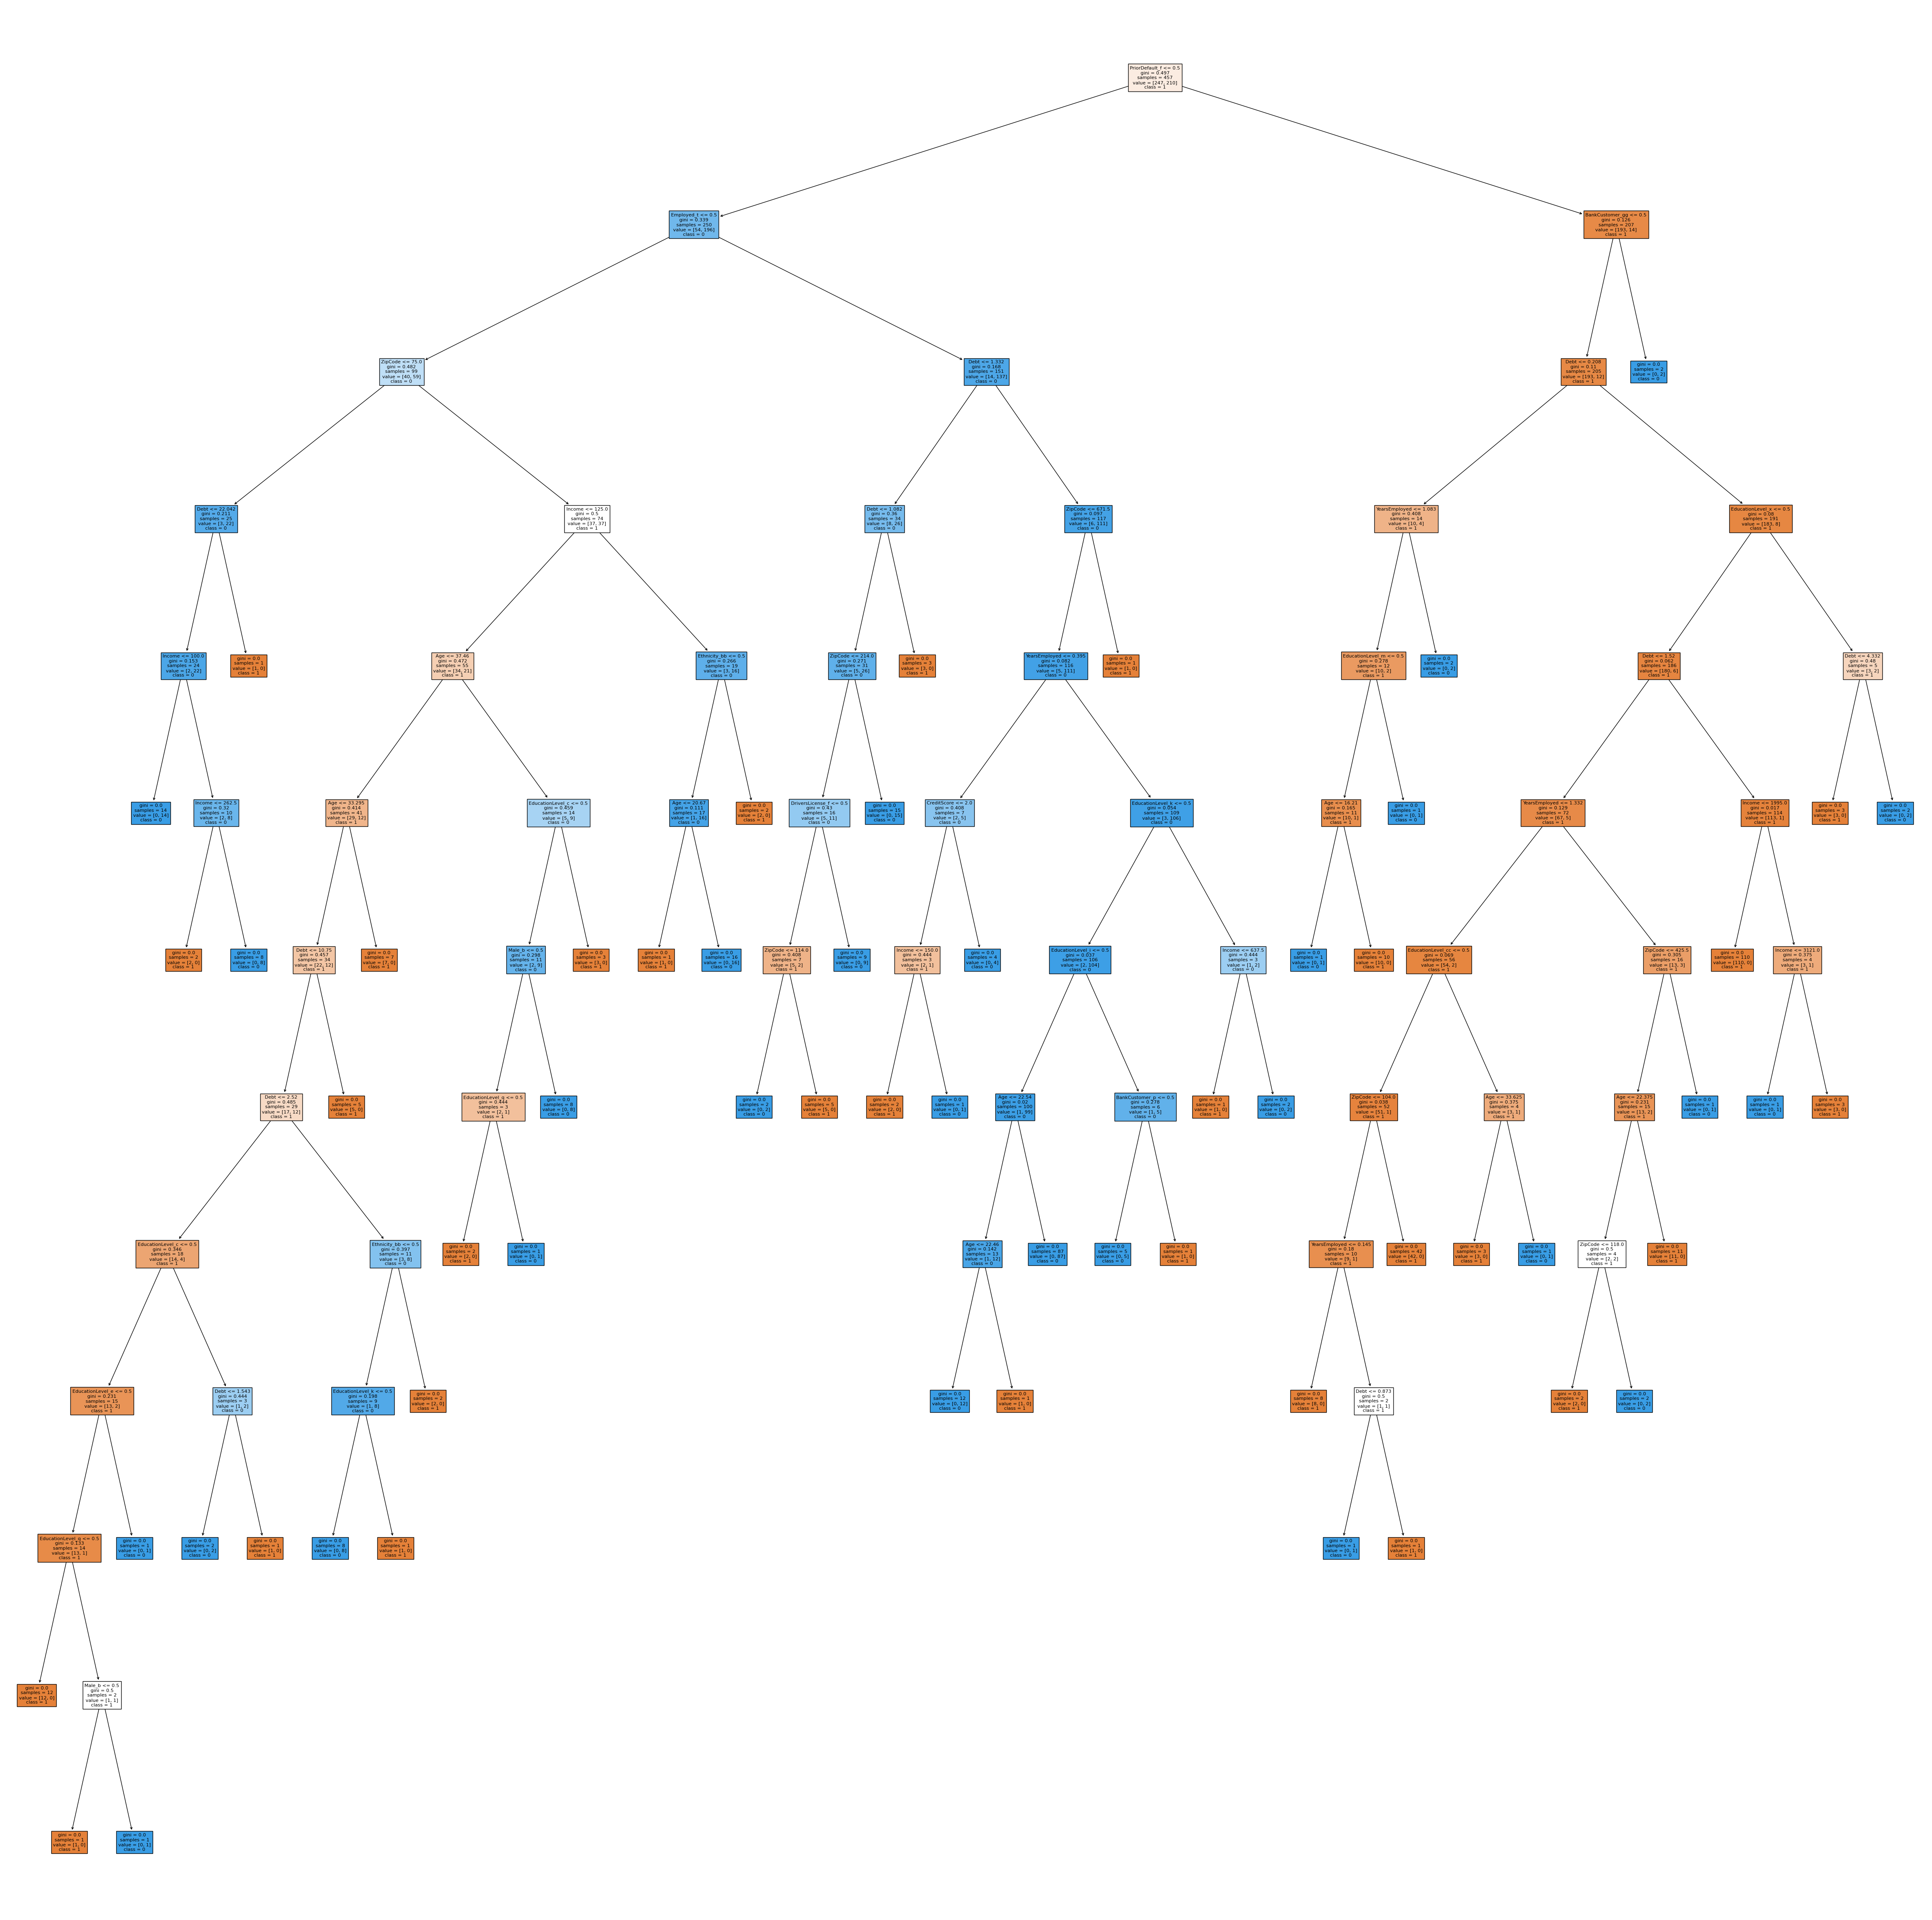

In [79]:
# Visualizing the decision tree 
fig = plt.figure(figsize=(60,60))
_ = tree.plot_tree(d_tree, 
                   feature_names=list(X.columns),  
                   class_names=Y.unique().astype(str).tolist(),
                   filled=True)

In [80]:
# I am printing this list just to see which index represent which feature. This will allow me to interpret the tree easily.

X_test.columns

Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income',
       'Male_a', 'Male_b', 'Married_l', 'Married_u', 'Married_y',
       'BankCustomer_g', 'BankCustomer_gg', 'BankCustomer_p',
       'EducationLevel_aa', 'EducationLevel_c', 'EducationLevel_cc',
       'EducationLevel_d', 'EducationLevel_e', 'EducationLevel_ff',
       'EducationLevel_i', 'EducationLevel_j', 'EducationLevel_k',
       'EducationLevel_m', 'EducationLevel_q', 'EducationLevel_r',
       'EducationLevel_w', 'EducationLevel_x', 'Ethnicity_bb', 'Ethnicity_dd',
       'Ethnicity_ff', 'Ethnicity_h', 'Ethnicity_j', 'Ethnicity_n',
       'Ethnicity_o', 'Ethnicity_v', 'Ethnicity_z', 'PriorDefault_f',
       'PriorDefault_t', 'Employed_f', 'Employed_t', 'DriversLicense_f',
       'DriversLicense_t', 'Citizen_g', 'Citizen_p', 'Citizen_s'],
      dtype='object')

#### After looking at the results, it's clear that the primary attribute determining the classification outcome is PriorDefault_t, which suggests that an individual's history of loan default is the most significant predictor for approval. Following this, Employed_t, representing employment status, serves as the next important feature. These features suggest a model heavily weighted towards an applicant's financial reliability and current employment status.

#### Further down the tree, ZipCode and Debt introduce a geographical and financial dimension, indicating that the model takes into account regional economic factors and personal debt levels, respectively. Income emerges multiple times at various nodes, reinforcing its pivotal role in the decision-making process, likely reflecting the applicant's ability to repay.
#### Subsequent branches involving Age, and educational background variables like EducationLevel_c and EducationLevel_e, though less dominant, are indicative of the model's nuanced approach to demographic and educational factors

## Question 6

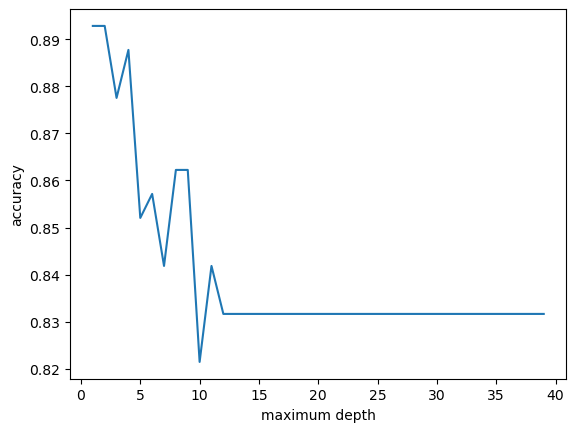

In [81]:
# Making a graph which will show accuracy of different models having varying depth of decision tree and then we will prune the model accordingly

max_depth = list(range(1, 40))
acc = []
for i in max_depth:
    dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=99)
    dtree.fit(X_train, Y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(pred, Y_test))

data = pd.DataFrame({'acc': acc, 'maxdepth': max_depth})
plt.plot('maxdepth', 'acc', data=data)
plt.xlabel('maximum depth')
plt.ylabel('accuracy')
plt.show()

#### This graphs shows that we have maximum accuracy when the depth of tree is zero which is not practically possible. So I have decided to look at the next absolute maximums (calculus concept) to select the suitable depth of tree. So for the pruned model I have decided to take depth 4 to get better results.

In [82]:
# Making the pruned model 
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=99)
dtree = dtree.fit(X_train, Y_train)
pred = dtree.predict(X_train)
acc = accuracy_score(pred, Y_train)
print( "Training accuracy ",acc * 100)

Training accuracy  89.93435448577681


In [83]:
# Looking at the decision tree formed 
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_37 <= 0.50
|   |--- feature_40 <= 0.50
|   |   |--- feature_4 <= 75.00
|   |   |   |--- feature_1 <= 22.04
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  22.04
|   |   |   |   |--- class: 0
|   |   |--- feature_4 >  75.00
|   |   |   |--- feature_5 <= 125.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  125.00
|   |   |   |   |--- class: 1
|   |--- feature_40 >  0.50
|   |   |--- feature_1 <= 1.33
|   |   |   |--- feature_1 <= 1.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  1.08
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  1.33
|   |   |   |--- feature_4 <= 671.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  671.50
|   |   |   |   |--- class: 0
|--- feature_37 >  0.50
|   |--- feature_8 <= 0.50
|   |   |--- feature_1 <= 0.21
|   |   |   |--- feature_2 <= 1.08
|   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  1.08
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  0.21
|   |   |   |--- feat

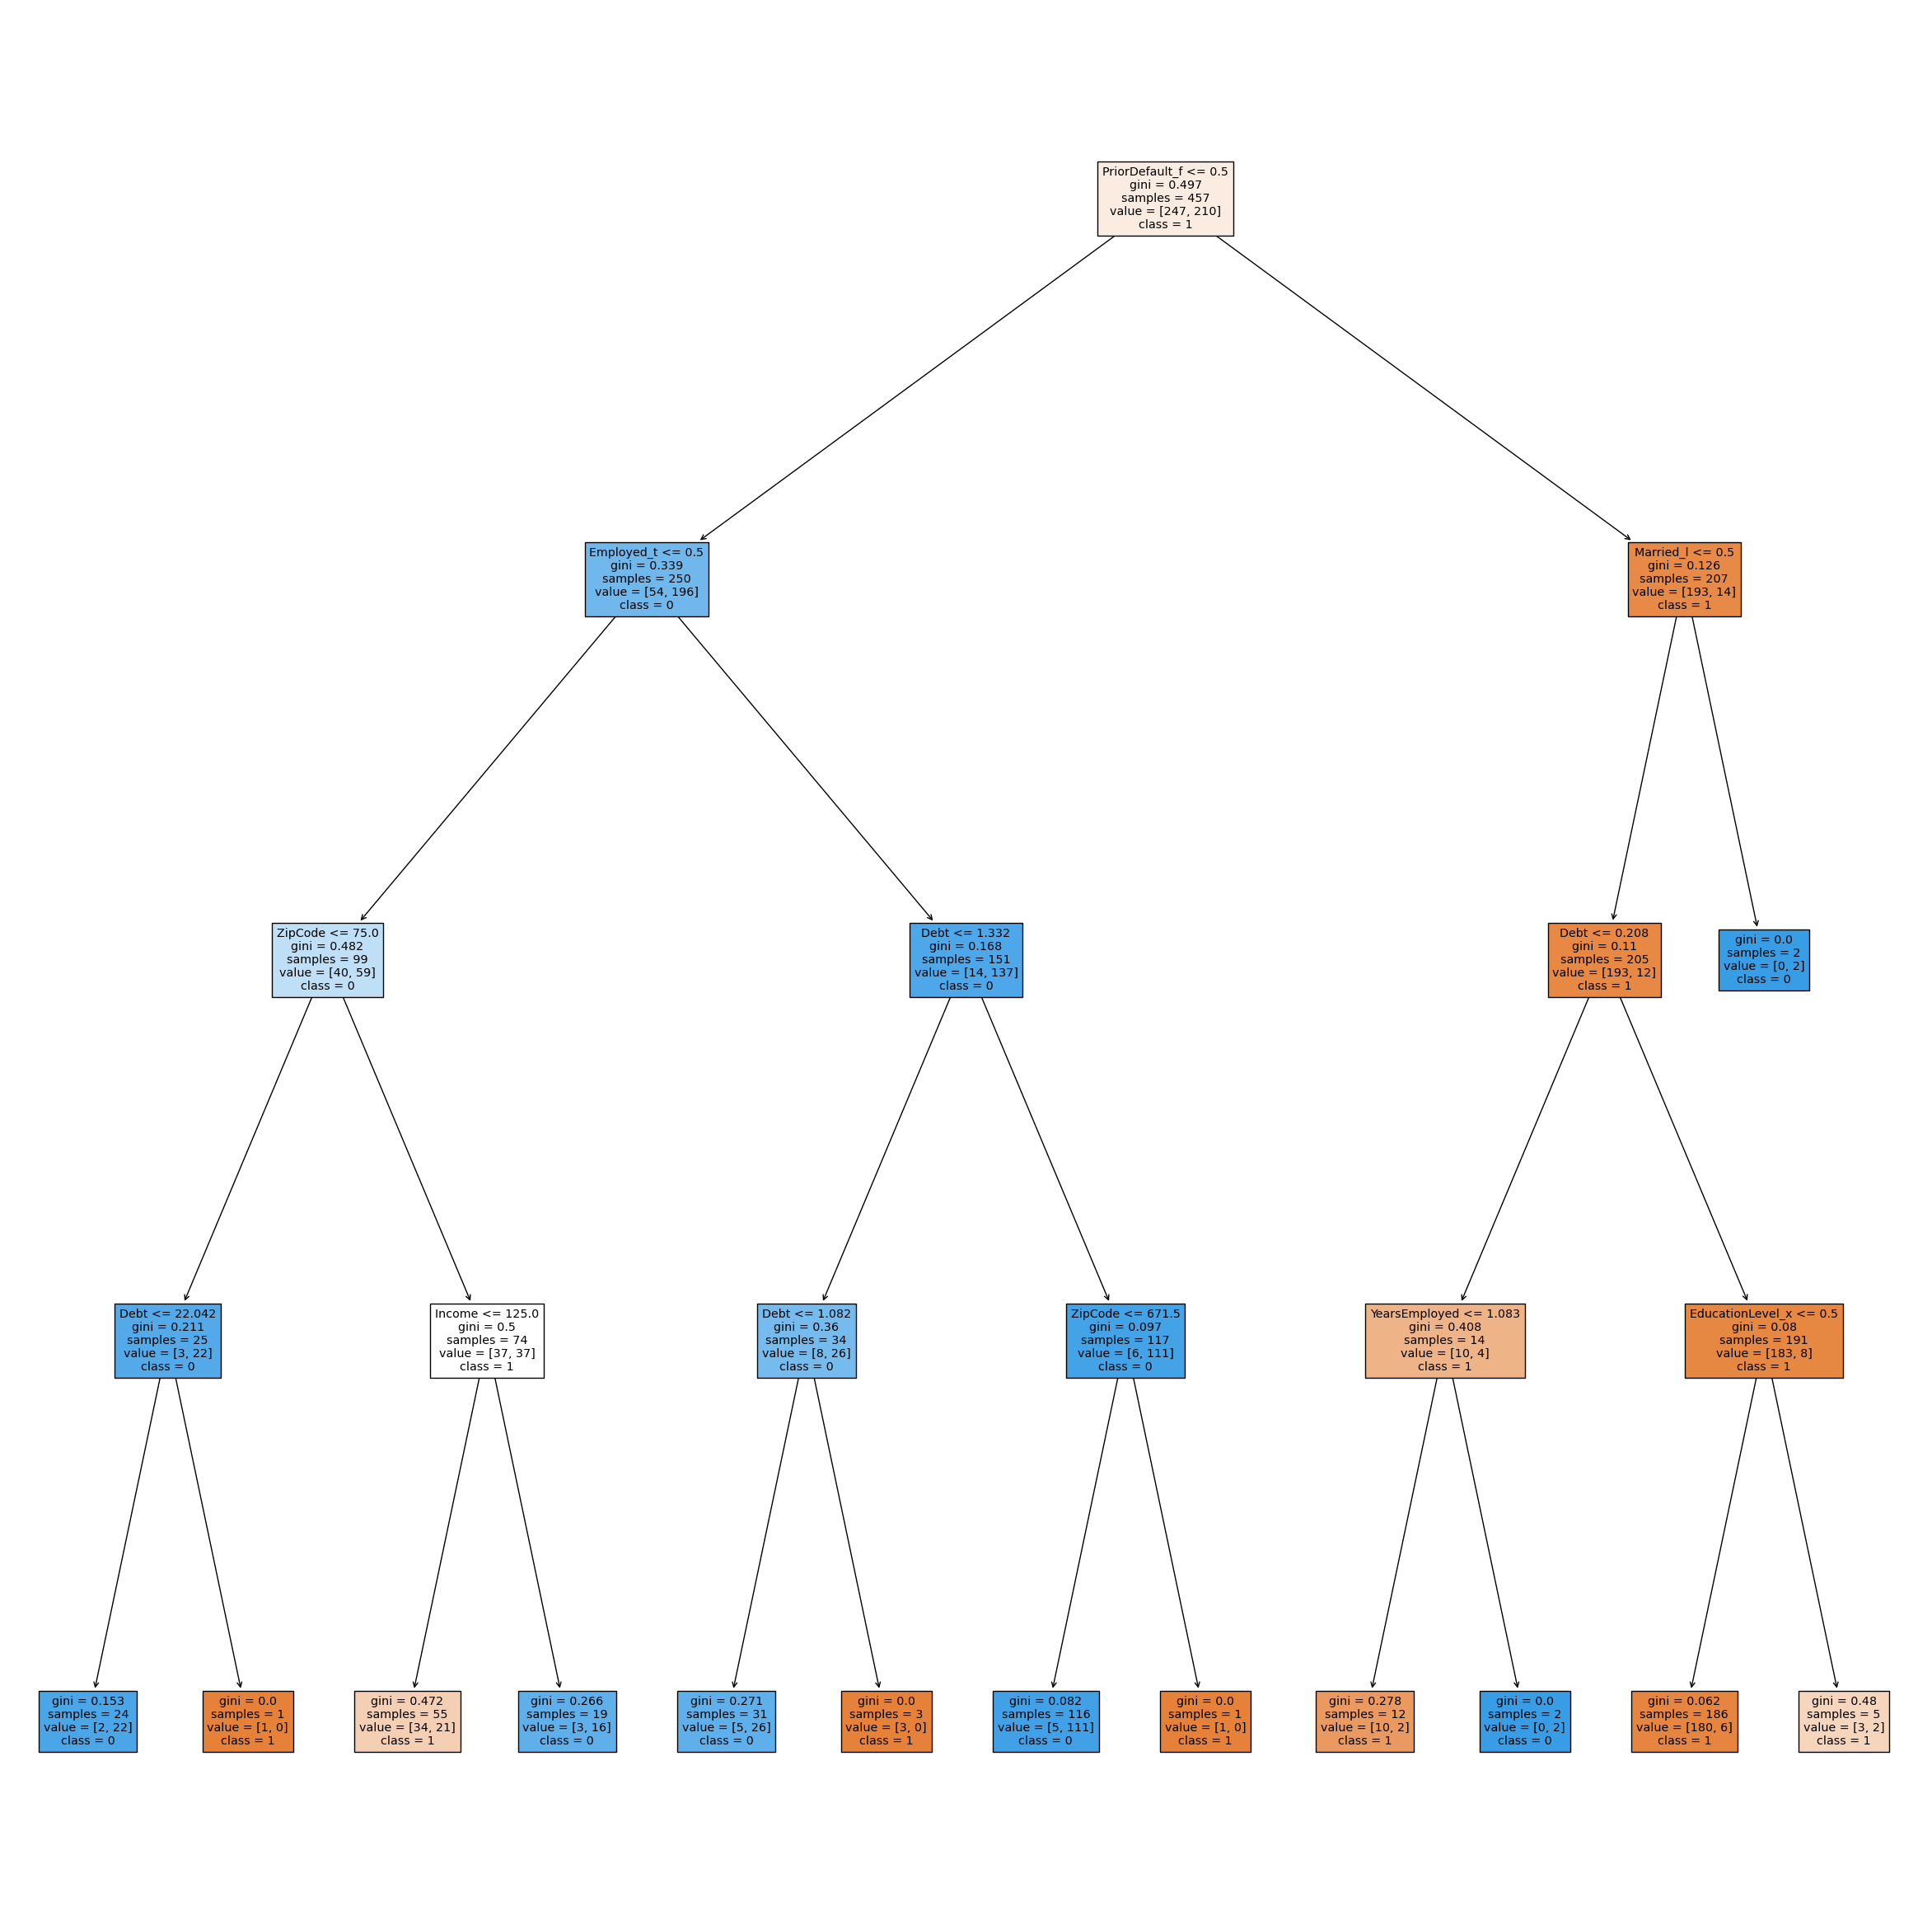

In [84]:
# Visualizing the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dtree, 
                   feature_names=list(X.columns),  
                   class_names=Y.unique().astype(str).tolist(),
                   filled=True)

#### The initial decision tree model presented a classic case of overfitting, with perfect training accuracy at 100% but a substantially lower testing accuracy of around 83%. A graphical analysis elaborated on this by showing a decrease in accuracy with increased tree depth, which is a typical symptom of a model learning too much noise from the training set.

#### In response, pruning was employed to simplify the model by limiting its depth to just 4 levels. This strategic move reduced the training accuracy to 89.9%, which might seem counterintuitive but is actually beneficial. The pruned model demonstrated an enhanced testing accuracy and a much narrower accuracy gap—a mere 1% between training and testing. This notable improvement underscores the efficacy of pruning in curtailing overfitting, enabling the model to retain only the most significant features that contribute to a robust and more accurate prediction on new data.

## Question 7

In [85]:
# creating a classification model to predict Approved status using RandomForest

for n_estimators in range(5, 100, 5):
    forest = RandomForestClassifier(n_estimators=n_estimators, random_state=99)
    forestModel = forest.fit(X_train, Y_train)
    
    pred_train = forestModel.predict(X_train)
    train_acc = accuracy_score(Y_train, pred_train) * 100
    
    pred_test = forestModel.predict(X_test)
    test_acc = accuracy_score(Y_test, pred_test) * 100
    
    print('Number of Trees: {}, Training Accuracy: {:.2f}, Testing Accuracy: {:.2f}'.format(n_estimators, train_acc, test_acc))

Number of Trees: 5, Training Accuracy: 97.59, Testing Accuracy: 89.80
Number of Trees: 10, Training Accuracy: 98.69, Testing Accuracy: 88.78
Number of Trees: 15, Training Accuracy: 99.12, Testing Accuracy: 90.31
Number of Trees: 20, Training Accuracy: 99.78, Testing Accuracy: 91.84
Number of Trees: 25, Training Accuracy: 99.78, Testing Accuracy: 91.33
Number of Trees: 30, Training Accuracy: 100.00, Testing Accuracy: 91.33
Number of Trees: 35, Training Accuracy: 100.00, Testing Accuracy: 90.31
Number of Trees: 40, Training Accuracy: 100.00, Testing Accuracy: 90.82
Number of Trees: 45, Training Accuracy: 100.00, Testing Accuracy: 91.33
Number of Trees: 50, Training Accuracy: 100.00, Testing Accuracy: 91.84
Number of Trees: 55, Training Accuracy: 100.00, Testing Accuracy: 91.84
Number of Trees: 60, Training Accuracy: 100.00, Testing Accuracy: 91.33
Number of Trees: 65, Training Accuracy: 100.00, Testing Accuracy: 91.84
Number of Trees: 70, Training Accuracy: 100.00, Testing Accuracy: 91.8

Text(0.5, 0, 'Random Forest Feature Importance')

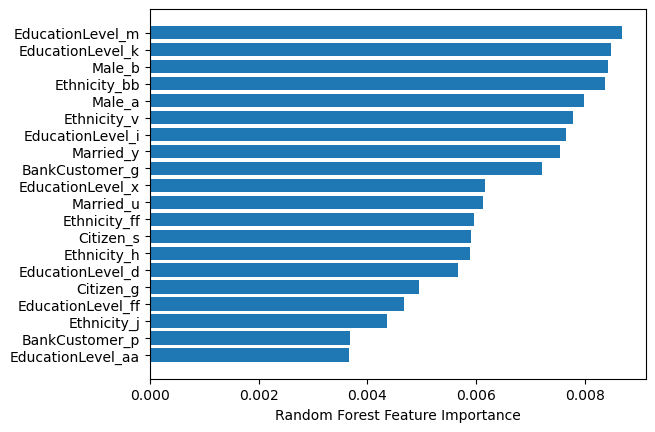

In [88]:
#Using fourth estimator as it gives joint highest testing accuracy of  91.84
n_estimators = 20

forest = RandomForestClassifier(n_estimators=n_estimators, random_state=99)
forestModel = forest.fit(X_train, Y_train)
pred_train = forestModel.predict(X_train)
pred_test = forestModel.predict(X_test)

#Calculating feature importances and sorting them 
sorted_idx = forestModel.feature_importances_.argsort()


#Plotting the top 20 feature importances
sorted_idx = forestModel.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][10:30], forestModel.feature_importances_[sorted_idx][10:30])
plt.xlabel("Random Forest Feature Importance")

#### We selected an estimator from the values 20, 55, 50 , 65 and 70 based on their superior accuracy.
#### The bar chart above illustrates the significance of each feature in the model. The most critical features include  'educationlevel', 'Male' and 'ethnicity'.

## Question 8

In [93]:
# Report the comparison between Decision Tree and RandomForest in terms of classification performance.

dt_score = cross_val_score(dtree, X, Y, cv=10)
print('Decision Tree score: ', dt_score.mean())

rf_score = cross_val_score(forestModel, X, Y, cv=10)
print('Random Forest score: ', rf_score.mean())

Decision Tree score:  0.8211655011655014
Random Forest score:  0.854825174825175


#### The comparative performance of Decision Tree and Random Forest models in classification contexts highlights that the Random Forest approach give higher accuracy. While both methodologies effectively discern true positives and negatives, Random Forest edges ahead with its robust cross-validation scores. The Decision Tree's reliance on significant pruning to avoid overfitting contrasts with the Random Forest's minimal tuning needs, yet it still trails in accuracy.

#### Random Forest's inherent design allows for incremental improvements in test accuracy by simply integrating more trees, a feature that enhances the model's predictive strength without diminishing its performance on training data. This flexibility, coupled with a lower need for model adjustment, tips the scales in favor of Random Forest as the preferred choice for accurate and efficient classification tasks.

## Question 9 Recommendation


In [95]:
# reading data from csv file
df = pd.read_csv('mcdonalds.csv')
df = df.drop('restaurant', axis=1)
df

,item,calories,cal_fat,total_fat,sat_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Artisan Grilled Chicken Sandwich,380,60,7,2.0,95,1110,44,3,11,37,4,20,20
1,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,155,1940,62,2,18,55,6,25,20
2,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,120,1980,81,4,18,46,6,20,20
3,Big Mac,540,250,28,10.0,80,950,46,3,9,25,10,2,15
4,Cheeseburger,300,100,12,5.0,40,680,33,2,7,15,10,2,10
5,Classic Chicken Sandwich,510,210,24,4.0,65,1040,49,3,6,25,0,4,2
6,Filet-O-Fish,380,170,18,4.0,40,640,38,2,5,15,2,0,15
7,Hamburger,250,70,8,3.0,30,480,31,2,6,13,2,2,4
8,Lobster Roll,290,50,5,1.5,65,630,35,2,3,24,4,6,15
9,McChicken,350,130,15,3.5,40,600,40,2,5,15,2,2,4


|--- feature_11 <= 1.00
|   |--- feature_2 <= 23.00
|   |   |--- class: Filet-O-Fish
|   |--- feature_2 >  23.00
|   |   |--- class: 4 piece Buttermilk Crispy Chicken Tenders
|--- feature_11 >  1.00
|   |--- feature_3 <= 1.00
|   |   |--- class: Premium Asian Salad w/o Chicken
|   |--- feature_3 >  1.00
|   |   |--- feature_4 <= 35.00
|   |   |   |--- feature_10 <= 1.00
|   |   |   |   |--- class: 4 Piece Chicken McNuggets
|   |   |   |--- feature_10 >  1.00
|   |   |   |   |--- class: Hamburger
|   |   |--- feature_4 >  35.00
|   |   |   |--- feature_9 <= 19.50
|   |   |   |   |--- feature_6 <= 36.50
|   |   |   |   |   |--- class: Cheeseburger
|   |   |   |   |--- feature_6 >  36.50
|   |   |   |   |   |--- class: McChicken
|   |   |   |--- feature_9 >  19.50
|   |   |   |   |--- feature_5 <= 790.00
|   |   |   |   |   |--- class: Lobster Roll
|   |   |   |   |--- feature_5 >  790.00
|   |   |   |   |   |--- feature_0 <= 445.00
|   |   |   |   |   |   |--- class: Artisan Grilled Chic

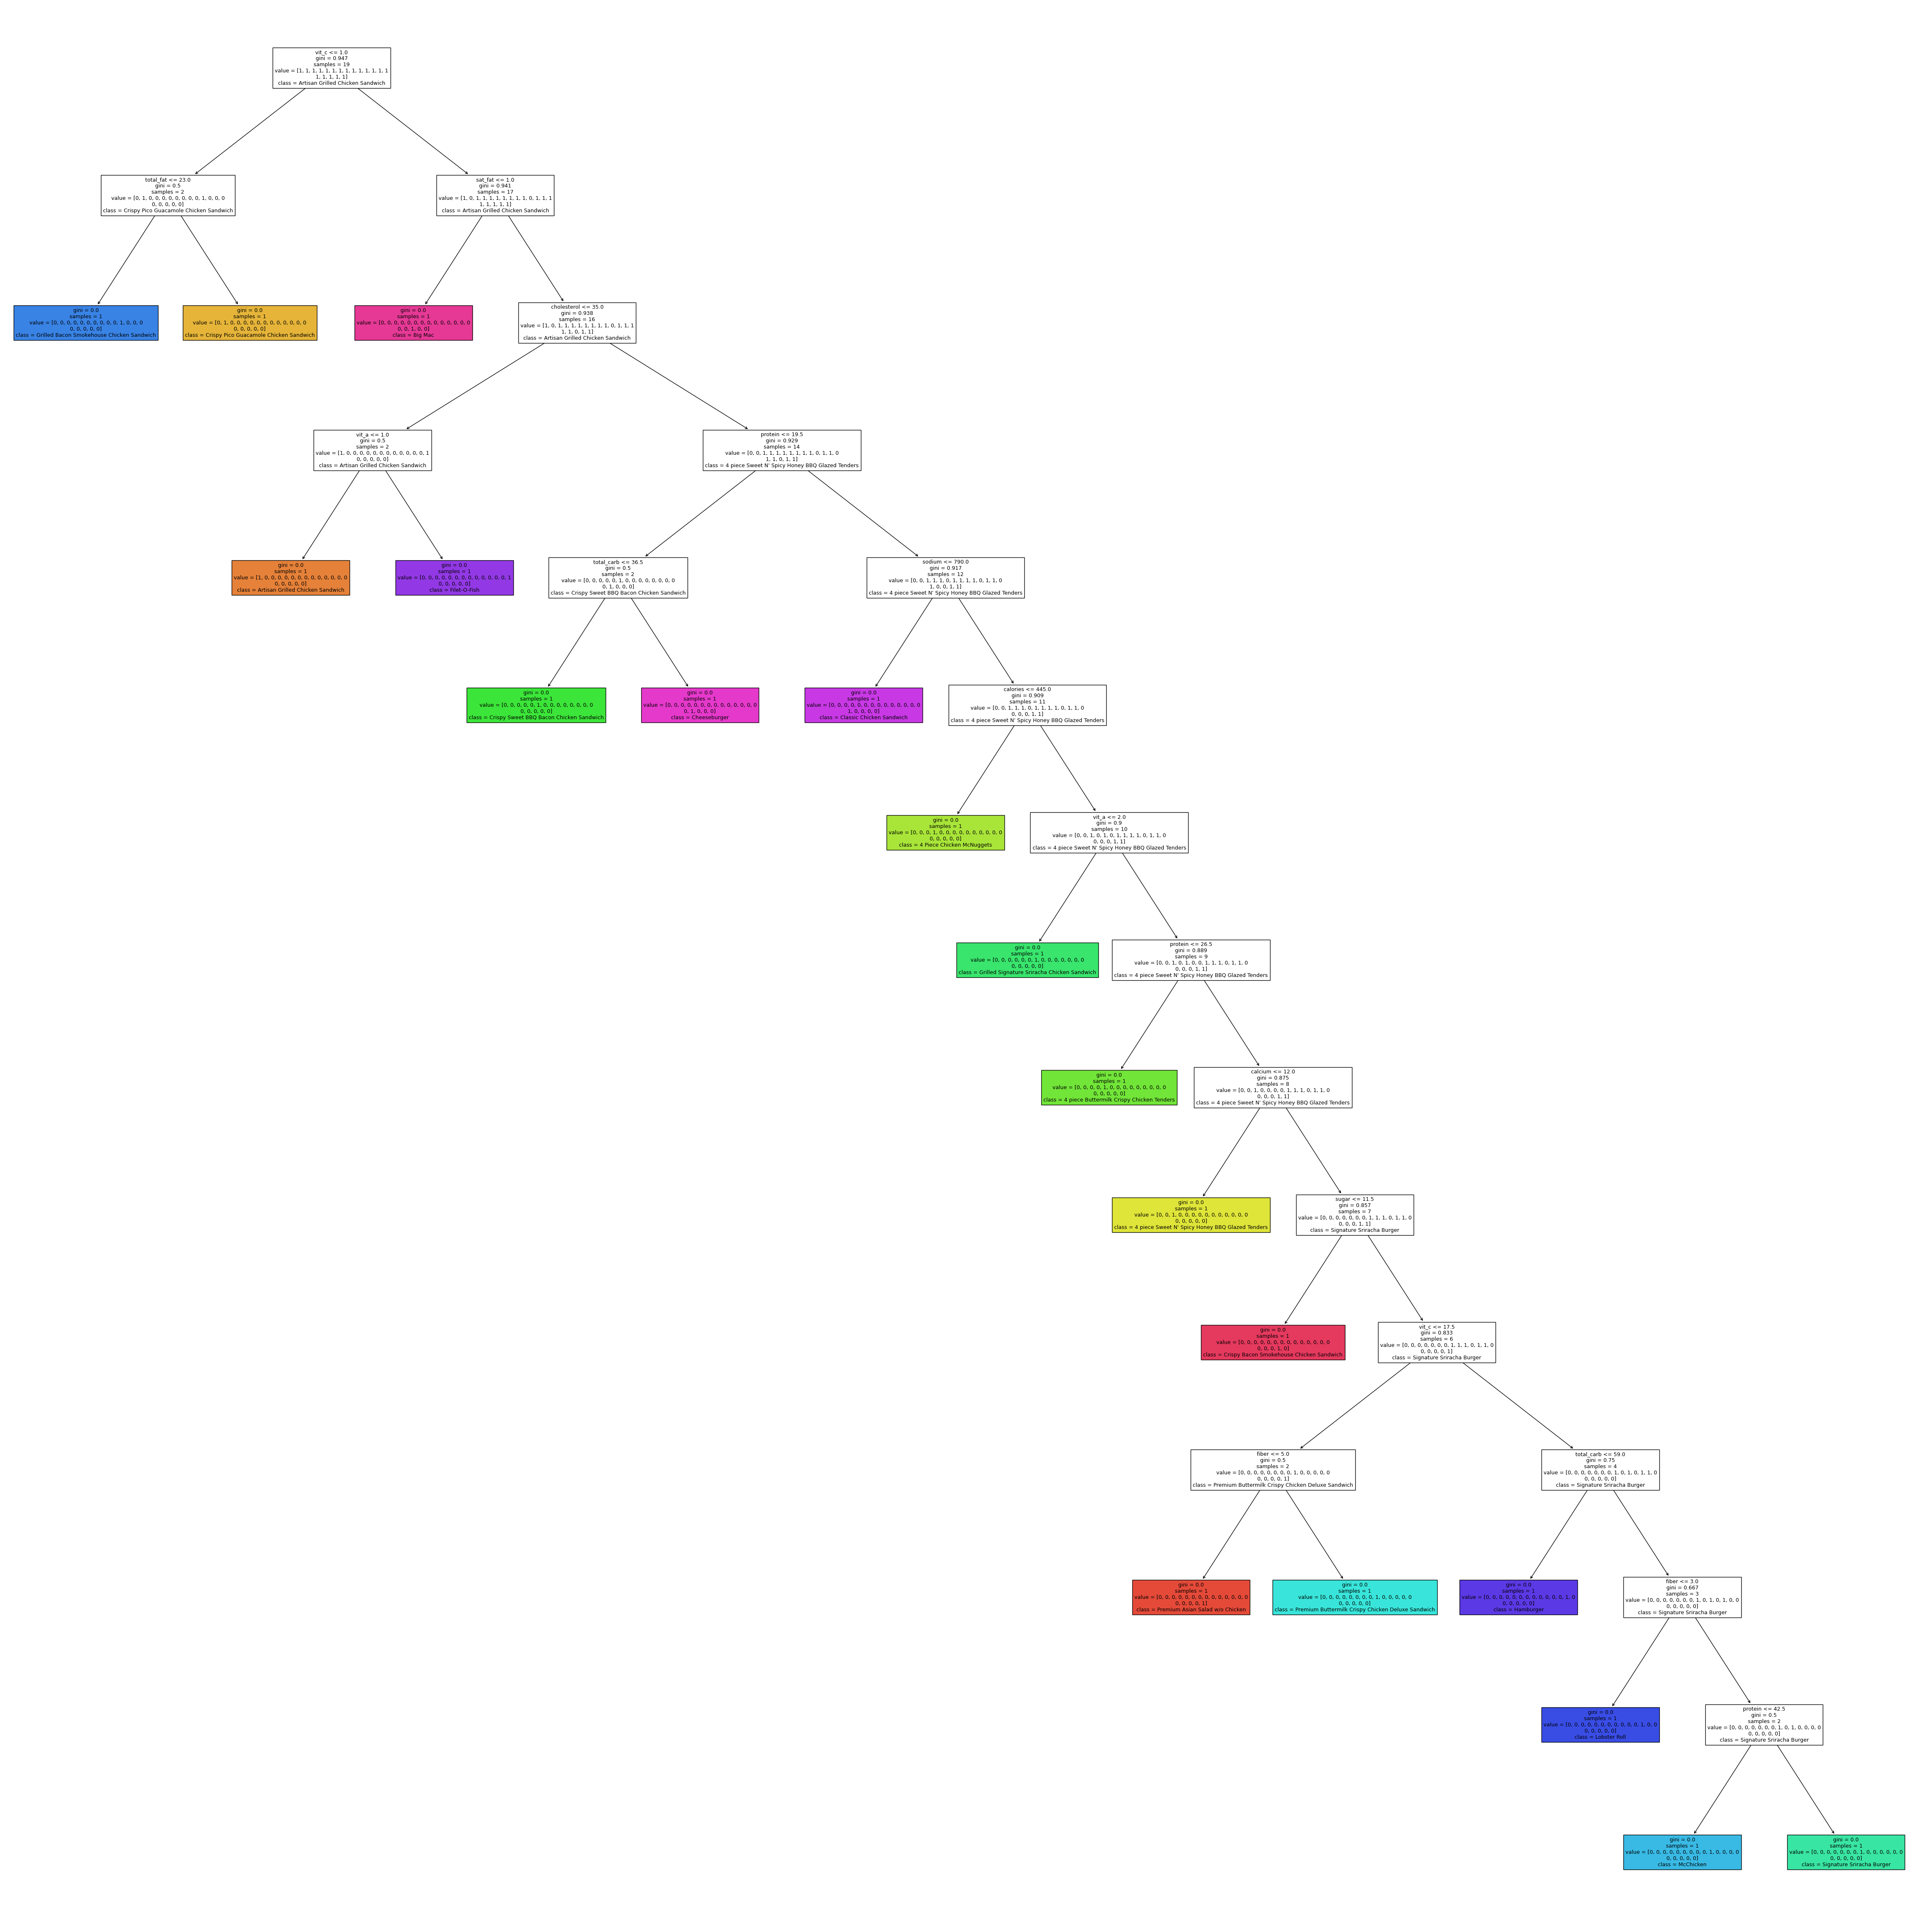

In [97]:
# Build a decision tree to recommend similar food based on their attributes. Interpret your decision tree and tell some interesting insights from it. You do not (necessarily) need to pick all the food (rows) and attributes (columns). Just pick 3 similar food itemsof your choiceand explain/interpretyourrecommendations.Note: You need to remove restaurant column first from the data before creating a decision tree

X = df.drop('item', axis=1)
Y = df['item']

#initializing decision tree
dt = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=100)

dtree = dt.fit(X, Y)

printed_tree = tree.export_text(dtree)
print(printed_tree)


figure = plt.figure(figsize=(60, 60))
_ = tree.plot_tree(dtree, 
                   feature_names=list(X.columns),
                   class_names=Y.value_counts().index.tolist(), 
                   filled=True)

#### The decision tree's initial split based on Vitamin C content (feature_11) prominently highlights the nutritional emphasis on either a diet rich in this vitamin or not. Foods like the 'Premium Asian Salad w/o Chicken' are distinctly classified due to their low cholesterol content, appealing to those seeking heart-healthy options. Conversely, items like the 'Filet-O-Fish' and '4 piece Buttermilk Crispy Chicken Tenders' are differentiated primarily by fat content, guiding choices for those monitoring fat intake.

#### Further down the tree, the 'Artisan Grilled Chicken Sandwich' and 'Classic Chicken Sandwich' are discerned by caloric thresholds, indicating a decision factor for diet-conscious consumers. Notably, the 'Cheeseburger', 'McChicken', and 'Lobster Roll' cluster together under a branch with higher saturated fat, which may inform individuals looking for more indulgent options. These insights show the tree's utility in navigating dietary choices based on fat, cholesterol, and Vitamin C content, catering to diverse nutritional preferences and health goals.